In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

fontfamily = "Inconsolata"

sns.set_theme(style="whitegrid",
              context="paper",
              font_scale=1.25,
              rc={
                  "figure.figsize": (10.5, 4.5),
                  "figure.dpi": 150,
                  "grid.alpha": 0.1,
                  "grid.color": "#1b262c",
                  "grid.linewidth": 0.5,
                  "font.family": fontfamily
              })

_30k = ["#202f66", "#ff7048", "#7f68d0", "#f3d36e", "#d869ab", "#48ADA9", "#1b262c"]
sns.set_palette(_30k)

import warnings
warnings.filterwarnings('ignore')

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

pio.templates.default = "plotly_dark"

plotly_config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': 'custom_image',
    'height': 900,
    'width': 2100,
    'scale': 1 # Multiply title/legend/axis/canvas sizes by this factor
  }
}

# custom plotly font
plotly_fontsize = 14
pio.templates[pio.templates.default].layout['font']["family"] = fontfamily
pio.templates[pio.templates.default].layout['font']["size"] = plotly_fontsize
pio.templates[pio.templates.default].layout['title']['font']['size'] = round(plotly_fontsize*1.6)

In [2]:
history_df = pd.read_json("./Takeout/YouTube and YouTube Music/history/watch-history.json")

In [3]:
history_df['time'] = pd.to_datetime(history_df['time'])
history_df = history_df[history_df['time'] >= '2021-01-01']
history_df = history_df.sort_values(by=['time'], ascending=True)
history_df = history_df[~history_df['titleUrl'].isna()]

In [4]:
df = pd.read_csv("./yt_thumbnail_palettes.csv")
df

,color,freq,ratio,vid
0,#000000,7613,0.619548,oe01JMWrbH8
1,#314141,4221,0.343506,oe01JMWrbH8
2,#ffffff,233,0.018962,oe01JMWrbH8
3,#616163,63,0.005127,oe01JMWrbH8
4,#c2c2c2,60,0.004883,oe01JMWrbH8
...,...,...,...,...
29676,#766338,1,0.000081,JfdPcFdGQzo
29677,#e3d3af,1,0.000081,JfdPcFdGQzo
29678,#4ad0ce,1,0.000081,JfdPcFdGQzo
29679,#4a3f42,1,0.000081,JfdPcFdGQzo


In [5]:
colors_df = pd.DataFrame(df['color'].drop_duplicates())
colors_df

,color
0,#000000
1,#314141
2,#ffffff
3,#616163
4,#c2c2c2
...,...
29676,#766338
29677,#e3d3af
29678,#4ad0ce
29679,#4a3f42


In [6]:
def pad_array(arr, max_length=10):
    if max_length - len(arr) > 0:
        pad_length = max_length - len(arr)
    else:
        pad_length = 0
    
    return np.pad(np.array(arr, dtype=np.float), (0, pad_length), mode='constant', constant_values=(np.nan, np.nan))

In [7]:
df = pd.merge(df, colors_df.reset_index().set_index('color'), on='color')

In [8]:
(df.groupby(by=['vid']).count()['color']).describe()

count    785.000000
mean      37.810191
std       20.711660
min        3.000000
25%       22.000000
50%       34.000000
75%       51.000000
max      107.000000
Name: color, dtype: float64

In [19]:
num_colors = 20

In [20]:
vid_palette_arr = []

for i, his in history_df.iterrows():
    vid = his['titleUrl'].split('=')[1]
    vid_palette = np.array(df[df['vid'] == vid]['index'])[:]
    if len(vid_palette) < num_colors:
        vid_palette = pad_array(vid_palette, num_colors)
    else:
        vid_palette = vid_palette[:num_colors]
    vid_palette_arr.append(vid_palette)

In [21]:
vid_palette_arr = np.array(vid_palette_arr)

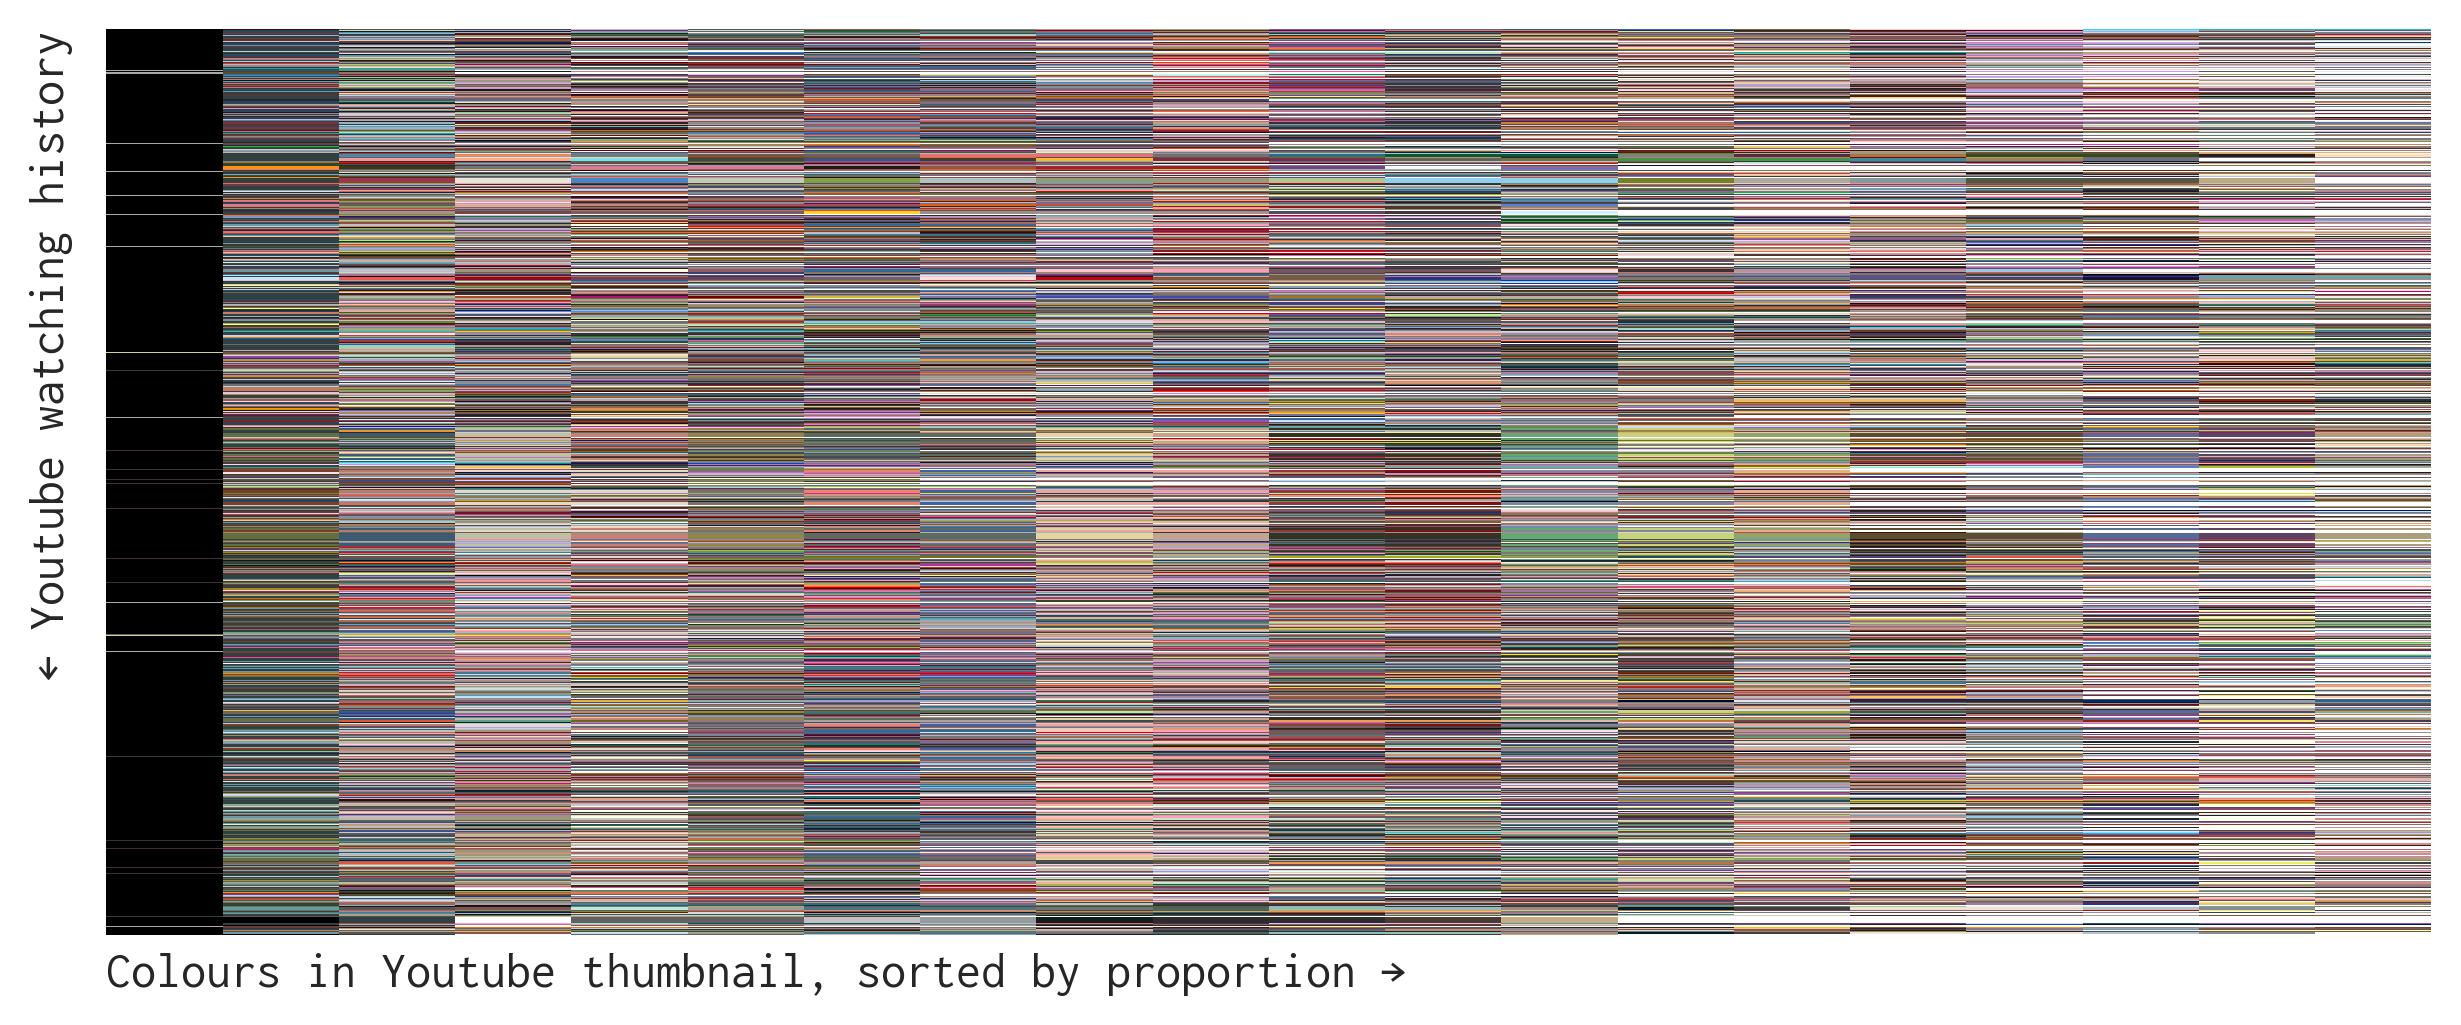

In [22]:
fig = plt.figure(figsize=(10, 4), dpi=300)

sns.heatmap(vid_palette_arr, cmap=colors_df['color'].tolist(), cbar=False, square=False)

plt.xticks([], [])
plt.yticks([], [])
plt.xlabel("Colours in Youtube thumbnail, sorted by proportion →", ha='left', x=0)
plt.ylabel(" ← Youtube watching history", ha='right', y=1, labelpad=8)
plt.show()